<a href="https://colab.research.google.com/github/ZainabBee24/3MTT-Capstone-Project-Workbook-Codes/blob/main/Capstone1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A zip file of the dataset for this project which contains five to six different CSV files was downloaded from Kaggle. Two out of the datasets were picked for this project and uploaded to Google drive. From the drive the datasets are easily uploaded into this notebook. To begin the task pandas is imported to ensure efficient performance of the tasks on the notebook

In [ ]:
import pandas as pd

The first dataset titled 'covid19 clean complete' is imported into the notebook with a read CSV command

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Data2/Capstone/Capstone 2/covid_19_clean_complete.csv')
df1

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
df1.isna().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


To check the dataset shape and content,the sum of null values, the dataset info, the sum of duplicated row, are checked using the following codes individually

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
#Check for duplicates
df1.duplicated().sum()

0

To get rid of unwanted or useless columns the columns were inspected

In [ ]:
df1.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

Upon checking the columns and studying the dataset insignificant columns with high number of null values were dropped

In [ ]:
#handle missing values #drop rows and columns
df1_cleaned = df1.drop(columns=['Province/State', 'Confirmed', 'Deaths', 'Recovered', 'Active'], inplace=True, errors='ignore')
df1_cleaned

Checking the head regularly to ensure all commands runned are effective

In [ ]:
df1.head(2)

,Country/Region,Lat,Long,Date,WHO Region
0,Afghanistan,33.93911,67.709953,2020-01-22,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,Europe


Using the following codes whitespaces are stripped, and also to ensure consistency all capitalizations standardized.
To further ensure consistent flow of the data unique values along the country / region columns were checked.

In [ ]:
# Strip whitespace and standardize capitalization
df1['Country/Region'] = df1['Country/Region'].str.strip().str.title()

# Check unique values for inconsistencies
print(df1['Country/Region'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua And Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia And Herzegovina' 'Brazil'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica' "Cote D'Ivoire"
 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Greenland' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala'
 'Guinea' 'Guyana' 'Haiti' 'Holy See' 'Honduras' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'South Korea' 'Kuwait' 'Kyrgyzstan'
 'Latvia' 'Lebanon' 'Liberia' 

The next step is to check for non-numeric values in numeric columns, to check and drop missing and out of range values where necessary in the latitude and longitude columns.

In [ ]:
# Check for non-numeric values
print(df1[['Lat', 'Long']].dtypes)

# Convert to float if necessary
df1['Lat'] = pd.to_numeric(df1['Lat'], errors='coerce')
df1['Long'] = pd.to_numeric(df1['Long'], errors='coerce')

# Drop or impute missing/out-of-range values
df1 = df1[(df1['Lat'].between(-90, 90)) & (df1['Long'].between(-180, 180))]

Lat     float64
Long    float64
dtype: object


By assigning new variable df1_numeric a code is run to ensure all other numeric columns are numeric.
And then the columns converted to integer to reduce overcrowding and too much noise in the data

In [ ]:
# Ensure all numeric columns are numeric
df1_numeric = df1.select_dtypes(include=['number'])

# Convert columns in df1_numeric to int
df1_numeric = df1_numeric.astype(int)

The dataset description is checked after the conversion to ensure effectivity

In [ ]:
df1.describe

<bound method NDFrame.describe of               Country/Region        Lat       Long        Date  \
0                Afghanistan  33.939110  67.709953  2020-01-22   
1                    Albania  41.153300  20.168300  2020-01-22   
2                    Algeria  28.033900   1.659600  2020-01-22   
3                    Andorra  42.506300   1.521800  2020-01-22   
4                     Angola -11.202700  17.873900  2020-01-22   
...                      ...        ...        ...         ...   
49063  Sao Tome And Principe   0.186400   6.613100  2020-07-27   
49064                  Yemen  15.552727  48.516388  2020-07-27   
49065                Comoros -11.645500  43.333300  2020-07-27   
49066             Tajikistan  38.861000  71.276100  2020-07-27   
49067                Lesotho -29.610000  28.233600  2020-07-27   

                  WHO Region  
0      Eastern Mediterranean  
1                     Europe  
2                     Africa  
3                     Europe  
4                     Africa  
...                      ...  
49063                 Africa  
49064  Eastern Mediterranean  
49065                 Africa  
49066                 Europe  
49067                 Africa  

[49068 rows x 5 columns]>

The date column need to be converted to datetime format. A new column is created by copying the data from the date column and converted into the date time format. The previous date column is then dropped.

In [ ]:
# Convert to datetime
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')

# Drop rows with invalid dates
df1 = df1.dropna(subset=['Date'])

# Ensure dates are within a reasonable range
print(df1['Date'].min(), df1['Date'].max())

2020-01-22 00:00:00 2020-07-27 00:00:00


In [ ]:
#Check for duplicates rows
print(df1.duplicated().sum())
df1 = df1.drop_duplicates()

0


Data types are checked for effectivity

In [ ]:
#Verify column data types
print(df1.dtypes)

Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
WHO Region                object
dtype: object


Duplicated rows in the geographic columns are dropped to validate geography consistency, and all other duplicates are generally dropped

In [ ]:
#Validate geographic consistency
print(df1[['Country/Region', 'Lat', 'Long']].drop_duplicates())

            Country/Region        Lat       Long
0              Afghanistan  33.939110  67.709953
1                  Albania  41.153300  20.168300
2                  Algeria  28.033900   1.659600
3                  Andorra  42.506300   1.521800
4                   Angola -11.202700  17.873900
..                     ...        ...        ...
256  Sao Tome And Principe   0.186400   6.613100
257                  Yemen  15.552727  48.516388
258                Comoros -11.645500  43.333300
259             Tajikistan  38.861000  71.276100
260                Lesotho -29.610000  28.233600

[261 rows x 3 columns]


Outliers are further checked in numerical columns using the following cell command

<Axes: >

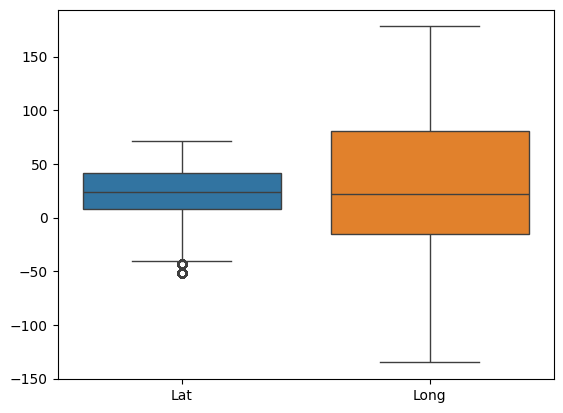

In [ ]:
#Handle outliers
#Check for outliers in numerical columns
import seaborn as sns
sns.boxplot(data=df1[['Lat', 'Long']])

Below is a summary of the basic cleaning steps performed to fit the format of the dataset

In [ ]:
# Clean Country/Region
df1['Country/Region'] = df1['Country/Region'].str.strip().str.title()

# Clean Latitude and Longitude
df1['Lat'] = pd.to_numeric(df1['Lat'], errors='coerce')
df1['Long'] = pd.to_numeric(df1['Long'], errors='coerce')
df1 = df1[(df1['Lat'].between(-90, 90)) & (df1['Long'].between(-180, 180))]

# Clean Date
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')
df1 = df1.dropna(subset=['Date'])

# Clean WHO Region
df1['WHO Region'] = df1['WHO Region'].str.strip().str.title()
region_mapping = {'Europe': 'European Region'}
df1['WHO Region'] = df1['WHO Region'].replace(region_mapping)

# Handle Missing Values
df1.fillna({'Country/Region': 'Unknown', 'WHO Region': 'Unknown'}, inplace=True)

# Remove Duplicates
df1 = df1.drop_duplicates()

# Verify the cleaned dataset
print(df1.info())
print(df1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  49068 non-null  object        
 1   Lat             49068 non-null  float64       
 2   Long            49068 non-null  float64       
 3   Date            49068 non-null  datetime64[ns]
 4   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 1.9+ MB
None
  Country/Region       Lat       Long       Date             WHO Region
0    Afghanistan  33.93911  67.709953 2020-01-22  Eastern Mediterranean
1        Albania  41.15330  20.168300 2020-01-22        European Region
2        Algeria  28.03390   1.659600 2020-01-22                 Africa
3        Andorra  42.50630   1.521800 2020-01-22        European Region
4         Angola -11.20270  17.873900 2020-01-22                 Africa


Recheck data info to ensure effective handling of missing values and data types

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  49068 non-null  object        
 1   Lat             49068 non-null  float64       
 2   Long            49068 non-null  float64       
 3   Date            49068 non-null  datetime64[ns]
 4   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 1.9+ MB


There are columns that need to be renamed, for accuracy. Using the lines of code below the specific columns are renamed and subsequently standardized to ensure consistency

In [ ]:
df1.rename(columns={'Country/Region': 'Country'}, inplace=True)

In [ ]:
#To standardize capitalization and remove extra spaces
df1['Country'] = df1['Country'].str.strip().str.title()

The second dataset is uploaded into the notebook and cleaned using similar steps to the ones employed above

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Data2/Capstone/Capstone 2/worldometer_data.csv')
df2.head(4)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe


In [ ]:
df2.describe()

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,2.080000e+02,2.090000e+02,4.000000,188.000000,3.000000,2.050000e+02,3.000000,2.050000e+02,122.000000,208.000000,187.000000,1.910000e+02,191.000000
mean,3.041549e+07,9.171850e+04,1980.500000,3792.590426,300.000000,5.887898e+04,1706.000000,2.766433e+04,534.393443,3196.024038,98.681176,1.402405e+06,83959.366492
std,1.047661e+08,4.325867e+05,3129.611424,15487.184877,451.199512,2.566984e+05,2154.779803,1.746327e+05,2047.518613,5191.986457,174.956862,5.553367e+06,152730.591240
min,8.010000e+02,1.000000e+01,20.000000,1.000000,1.000000,7.000000e+00,42.000000,0.000000e+00,1.000000,3.000000,0.080000,6.100000e+01,4.000000
25%,9.663140e+05,7.120000e+02,27.500000,22.000000,40.500000,3.340000e+02,489.000000,8.600000e+01,3.250000,282.000000,6.000000,2.575200e+04,8956.500000
50%,7.041972e+06,4.491000e+03,656.000000,113.000000,80.000000,2.178000e+03,936.000000,8.990000e+02,27.500000,1015.000000,29.000000,1.357020e+05,32585.000000
75%,2.575614e+07,3.689600e+04,2609.000000,786.000000,449.500000,2.055300e+04,2538.000000,7.124000e+03,160.250000,3841.750000,98.000000,7.576960e+05,92154.500000
max,1.381345e+09,5.032179e+06,6590.000000,162804.000000,819.000000,2.576668e+06,4140.000000,2.292707e+06,18296.000000,39922.000000,1238.000000,6.313960e+07,995282.000000


In [ ]:
df2.isna().sum()

,0
Country/Region,0
Continent,1
Population,1
TotalCases,0
NewCases,205
TotalDeaths,21
NewDeaths,206
TotalRecovered,4
NewRecovered,206
ActiveCases,4


In [ ]:
df2.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [ ]:
df2.isnull().sum()

,0
Country/Region,0
Continent,1
Population,1
TotalCases,0
NewCases,205
TotalDeaths,21
NewDeaths,206
TotalRecovered,4
NewRecovered,206
ActiveCases,4


In [ ]:
df2.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [ ]:
df2.duplicated().sum()

0

In [ ]:
df2.head(1)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,331198130.0,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas


In [ ]:
df2.rename(columns={'TotalCases' : 'Total_Cases', 'NewCases' : 'New_Cases', 'TotalDeaths' : 'Total_Deaths', 'NewDeaths' : 'New_Deaths', 'TotalRecovered' : 'Total_Recovered', 'ActiveCases' : 'Active_Cases', 'Serious,Critical' : 'Serious_Critical', 'TotalTests' : 'Total_Tests'}, inplace=True)

In [ ]:
df2.head(2)

,Country/Region,Continent,Population,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,NewRecovered,Active_Cases,Serious_Critical,Tot Cases/1M pop,Deaths/1M pop,Total_Tests,Tests/1M pop,WHO Region
0,USA,North America,331198130.0,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,212710692.0,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   Total_Cases       209 non-null    int64  
 4   New_Cases         4 non-null      float64
 5   Total_Deaths      188 non-null    float64
 6   New_Deaths        3 non-null      float64
 7   Total_Recovered   205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   Active_Cases      205 non-null    float64
 10  Serious_Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  Total_Tests       191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [ ]:
df2.drop(columns=['New_Cases', 'Total_Deaths', 'NewRecovered', 'Serious_Critical', 'WHO Region'], inplace=True)

In [ ]:
df2.drop(columns=['New_Deaths', 'Tot Cases/1M pop', 'Deaths/1M pop', 'Tests/1M pop'], inplace=True)

In [ ]:
df2.rename(columns={'Country/Region': 'Country'}, inplace=True)

In [ ]:
#standardize capitalizations and remove extra spaces
df2['Country'] = df2['Country'].str.strip().str.title()

In [ ]:
#handle missing values

df2['Population'] = df2['Population'].fillna(df2['Population'].median())

#handle missing values

df2['Population'] = df2['Population'].fillna(df2['Population'].median())

df2['Total_Cases'] = df2['Total_Cases'].fillna(0)
df2['Total_Recovered'] = df2['Total_Recovered'].fillna(0)
df2['Active_Cases'] = df2['Active_Cases'].fillna(0)
df2['Total_Tests'] = df2['Total_Tests'].fillna(0)

In [ ]:
#remove empty columns
df2.dropna(inplace = True)

In [ ]:
df2.isna().sum()

,0
Country,0
Continent,0
Population,0
Total_Cases,0
Total_Recovered,0
Active_Cases,0
Total_Tests,0


In [ ]:
#ensure numeric columns are numeric
numeric_cols = ['Population', 'Total_Cases', 'Total_Recovered', 'Active_Cases', 'Total_Tests']
df2[numeric_cols] = df2[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Ensure 'Continent' and 'Country' are strings
df2['Continent'] = df2['Continent'].astype(str)
df2['Country'] = df2['Country'].astype(str)

In [ ]:
# remove outlier or incorrect data
df2 = df2[(df2['Population'] > 0) & (df2['Total_Cases'] >= 0) & (df2['Total_Recovered'] >= 0) & (df2['Active_Cases'] >= 0) & (df2['Total_Tests'] >= 0)]

In [ ]:
#check for duplicates rows
df2.drop_duplicates()
df2.duplicated().sum()

0

In [ ]:
#feature engineering
# to enrich your dataset drive new features

#case per population
df2['Cases_Per_Population'] = df2['Total_Cases'] / df2['Population']

#recovery rate
df2['Recovery_Rate'] = df2['Total_Recovered'] / df2['Total_Cases']

#Active cases ratio
df2['Active_Cases_Ratio'] = df2['Active_Cases'] / df2['Total_Cases']

In [ ]:
#using unique to verify
print(df2['Country'].unique())

#crosschecking the first dataset to ensure consistency
print(df1['Country'].unique())

['Usa' 'Brazil' 'India' 'Russia' 'South Africa' 'Mexico' 'Peru' 'Chile'
 'Colombia' 'Spain' 'Iran' 'Uk' 'Saudi Arabia' 'Pakistan' 'Bangladesh'
 'Italy' 'Turkey' 'Argentina' 'Germany' 'France' 'Iraq' 'Philippines'
 'Indonesia' 'Canada' 'Qatar' 'Kazakhstan' 'Egypt' 'Ecuador' 'Bolivia'
 'Sweden' 'Oman' 'Israel' 'Ukraine' 'Dominican Republic' 'Panama'
 'Belgium' 'Kuwait' 'Belarus' 'Uae' 'Romania' 'Netherlands' 'Singapore'
 'Guatemala' 'Portugal' 'Poland' 'Nigeria' 'Honduras' 'Bahrain' 'Japan'
 'Armenia' 'Ghana' 'Kyrgyzstan' 'Afghanistan' 'Switzerland' 'Algeria'
 'Azerbaijan' 'Morocco' 'Uzbekistan' 'Serbia' 'Moldova' 'Ireland' 'Kenya'
 'Venezuela' 'Nepal' 'Austria' 'Costa Rica' 'Ethiopia' 'Australia'
 'El Salvador' 'Czechia' 'Cameroon' 'Ivory Coast' 'S. Korea' 'Denmark'
 'Palestine' 'Bosnia And Herzegovina' 'Bulgaria' 'Madagascar' 'Sudan'
 'North Macedonia' 'Senegal' 'Norway' 'Drc' 'Malaysia' 'French Guiana'
 'Gabon' 'Tajikistan' 'Guinea' 'Haiti' 'Finland' 'Zambia' 'Luxembourg'
 'Mauritania

In [ ]:
#check with the second dataset
print(df2['Country'].unique())

['Usa' 'Brazil' 'India' 'Russia' 'South Africa' 'Mexico' 'Peru' 'Chile'
 'Colombia' 'Spain' 'Iran' 'Uk' 'Saudi Arabia' 'Pakistan' 'Bangladesh'
 'Italy' 'Turkey' 'Argentina' 'Germany' 'France' 'Iraq' 'Philippines'
 'Indonesia' 'Canada' 'Qatar' 'Kazakhstan' 'Egypt' 'Ecuador' 'Bolivia'
 'Sweden' 'Oman' 'Israel' 'Ukraine' 'Dominican Republic' 'Panama'
 'Belgium' 'Kuwait' 'Belarus' 'Uae' 'Romania' 'Netherlands' 'Singapore'
 'Guatemala' 'Portugal' 'Poland' 'Nigeria' 'Honduras' 'Bahrain' 'Japan'
 'Armenia' 'Ghana' 'Kyrgyzstan' 'Afghanistan' 'Switzerland' 'Algeria'
 'Azerbaijan' 'Morocco' 'Uzbekistan' 'Serbia' 'Moldova' 'Ireland' 'Kenya'
 'Venezuela' 'Nepal' 'Austria' 'Costa Rica' 'Ethiopia' 'Australia'
 'El Salvador' 'Czechia' 'Cameroon' 'Ivory Coast' 'S. Korea' 'Denmark'
 'Palestine' 'Bosnia And Herzegovina' 'Bulgaria' 'Madagascar' 'Sudan'
 'North Macedonia' 'Senegal' 'Norway' 'Drc' 'Malaysia' 'French Guiana'
 'Gabon' 'Tajikistan' 'Guinea' 'Haiti' 'Finland' 'Zambia' 'Luxembourg'
 'Mauritania

In [ ]:
country_mapping = {
    'United States': 'USA',
    'United Kingdom': 'UK',
    # Add other mappings as necessary
}
df1['Country'] = df1['Country'].replace(country_mapping)

In [ ]:

country_mapping = {
    'United States': 'USA',
    'United Kingdom': 'UK',
    # Add other mappings as necessary
}
df2['Country'] = df2['Country'].replace(country_mapping)

In [ ]:
#merge datasets
merged_df = pd.merge(df1, df2, on='Country', how='inner')  # Use 'outer' if you want all rows

In [ ]:
#verify duplicates
print(merged_df.duplicated().sum())

0


In [ ]:
#columns have correct data types
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38352 entries, 0 to 38351
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Country               38352 non-null  object        
 1   Lat                   38352 non-null  float64       
 2   Long                  38352 non-null  float64       
 3   Date                  38352 non-null  datetime64[ns]
 4   WHO Region            38352 non-null  object        
 5   Continent             38352 non-null  object        
 6   Population            38352 non-null  float64       
 7   Total_Cases           38352 non-null  int64         
 8   Total_Recovered       38352 non-null  float64       
 9   Active_Cases          38352 non-null  float64       
 10  Total_Tests           38352 non-null  float64       
 11  Cases_Per_Population  38352 non-null  float64       
 12  Recovery_Rate         38352 non-null  float64       
 13  Active_Cases_Rat

In [ ]:
merged_df.head()

,Country,Lat,Long,Date,WHO Region,Continent,Population,Total_Cases,Total_Recovered,Active_Cases,Total_Tests,Cases_Per_Population,Recovery_Rate,Active_Cases_Ratio
0,Afghanistan,33.93911,67.709953,2020-01-22,Eastern Mediterranean,Asia,39009447.0,36896,25840.0,9758.0,90396.0,0.000946,0.700347,0.264473
1,Albania,41.15330,20.168300,2020-01-22,European Region,Europe,2877470.0,6016,3155.0,2673.0,38997.0,0.002091,0.524435,0.444315
2,Algeria,28.03390,1.659600,2020-01-22,Africa,Africa,43926079.0,33626,23238.0,9115.0,0.0,0.000766,0.691072,0.271070
3,Andorra,42.50630,1.521800,2020-01-22,European Region,Europe,77278.0,944,828.0,64.0,3750.0,0.012216,0.877119,0.067797
4,Angola,-11.20270,17.873900,2020-01-22,Africa,Africa,32956300.0,1483,520.0,899.0,64747.0,0.000045,0.350641,0.606204


In [ ]:
#save cleaned dataset
merged_df.to_csv('cleaned_covid_data.csv', index=False)

In [ ]:
proc = pd.read_csv('/content/cleaned_covid_data.csv')
proc.head(2)

,Country,Lat,Long,Date,WHO Region,Continent,Population,Total_Cases,Total_Recovered,Active_Cases,Total_Tests,Cases_Per_Population,Recovery_Rate,Active_Cases_Ratio
0,Afghanistan,33.93911,67.709953,2020-01-22,Eastern Mediterranean,Asia,39009447.0,36896,25840.0,9758.0,90396.0,0.000946,0.700347,0.264473
1,Albania,41.15330,20.168300,2020-01-22,European Region,Europe,2877470.0,6016,3155.0,2673.0,38997.0,0.002091,0.524435,0.444315


#Summary of Steps

Ensure column name uniformity.

Handle missing values and invalid entries.

Validate and correct data types.

Remove outliers and duplicates.

Create derived features (optional).

Merge datasets carefully.

Save the cleaned dataset for analysis.

<Axes: >

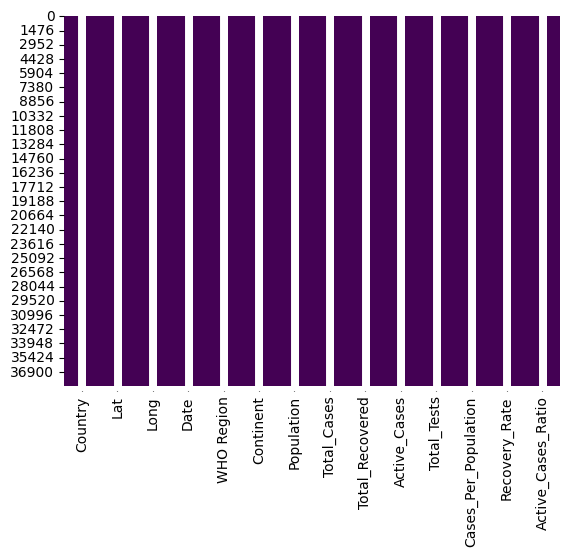

In [ ]:

#EDA
#null value analysis
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(proc.isnull(), cbar=False, annot=True, cmap="viridis")

In [ ]:
#regional insights / analysis
region_stats = proc.groupby('WHO Region')[['Total_Cases', 'Active_Cases', 'Total_Recovered']].mean()
print(region_stats)

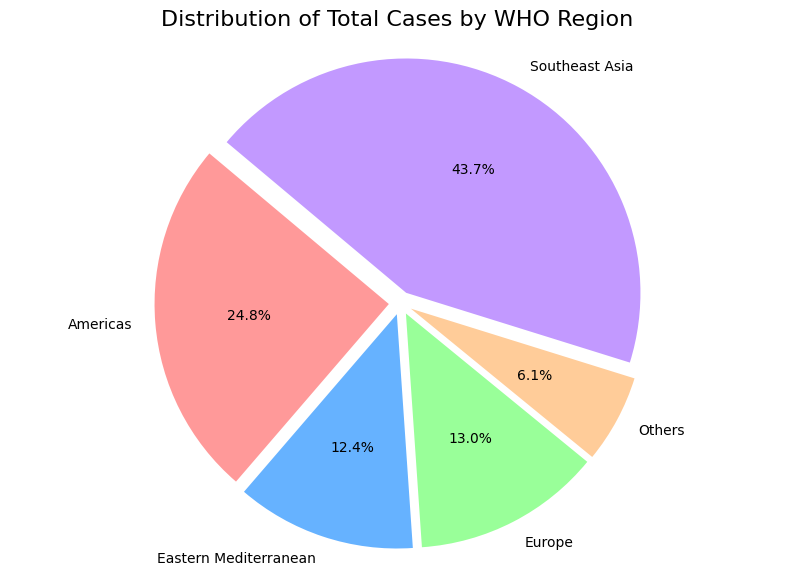

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'WHO Region': ['Africa', 'Europe', 'Americas', 'Eastern Mediterranean', 'Southeast Asia', 'Western Pacific'],
    'Total_Cases': [18698.272727, 80261.522388, 152833.795455, 76531.150000, 269615.777778, 19381.950000],
    'Total_Recovered': [13231.931818, 43057.029851, 109479.250000, 63872.400000, 180085.888889, 12130.000000],
    'Active_Cases': [5121.750000, 20832.940299, 36071.590909, 10562.250000, 83905.666667, 6981.600000]
}

df = pd.DataFrame(data)

# Normalize values to percentages for Total Cases
df['Total_Cases_Percent'] = (df['Total_Cases'] / df['Total_Cases'].sum()) * 100
df['Total_Cases_Percent'] = df['Total_Cases_Percent'].round(1)

# Combine small regions into "Others" if their contribution is < 5%
threshold = 5
df['Category'] = df.apply(
    lambda row: row['WHO Region'] if row['Total_Cases_Percent'] >= threshold else 'Others', axis=1
)
df_grouped = df.groupby('Category').sum().reset_index()

# Plot Total Cases as a pie chart
plt.figure(figsize=(10, 7))
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#C299FF', '#FF99FF']
plt.pie(df_grouped['Total_Cases_Percent'], labels=df_grouped['Category'], autopct='%1.1f%%', startangle=140, colors=colors, explode=[0.05]*len(df_grouped))
plt.title('Distribution of Total Cases by WHO Region', fontsize=16)
plt.axis('equal')
plt.show()

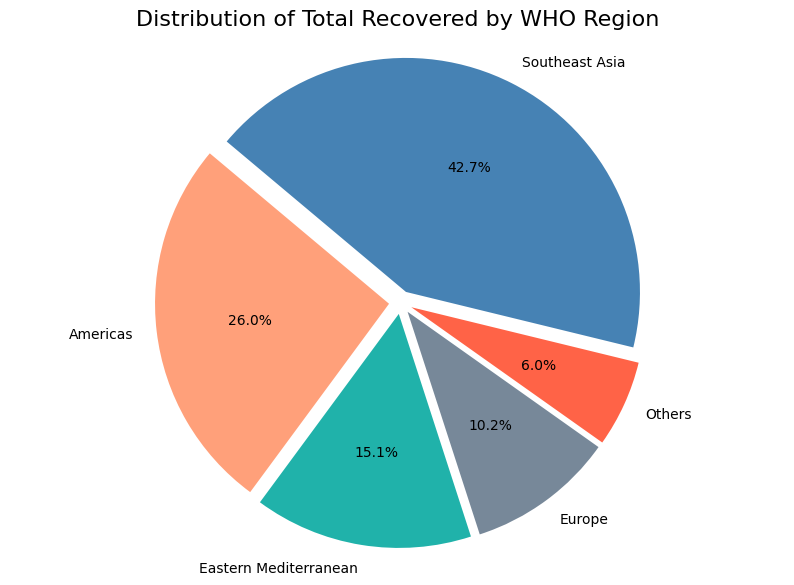

In [ ]:
#distribution of total recovered
# Sample data
data = {
    'WHO Region': ['Africa', 'Europe', 'Americas', 'Eastern Mediterranean', 'Southeast Asia', 'Western Pacific'],
    'Total_Recovered': [13231.931818, 43057.029851, 109479.250000, 63872.400000, 180085.888889, 12130.000000]
}

df = pd.DataFrame(data)

# Normalize Total Recovered to percentages
df['Total_Recovered_Percent'] = (df['Total_Recovered'] / df['Total_Recovered'].sum()) * 100
df['Total_Recovered_Percent'] = df['Total_Recovered_Percent'].round(1)

# Group smaller regions into "Others" if contribution is less than 5%
threshold = 5
df['Category'] = df.apply(
    lambda row: row['WHO Region'] if row['Total_Recovered_Percent'] >= threshold else 'Others', axis=1
)
df_grouped = df.groupby('Category')['Total_Recovered_Percent'].sum().reset_index()

# Plotting the pie chart
plt.figure(figsize=(10, 7))
colors = ['#FFA07A', '#20B2AA', '#778899', '#FF6347', '#4682B4', '#DAA520']
plt.pie(
    df_grouped['Total_Recovered_Percent'],
    labels=df_grouped['Category'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=[0.05] * len(df_grouped)
)
plt.title('Distribution of Total Recovered by WHO Region', fontsize=16)
plt.axis('equal')
plt.show()

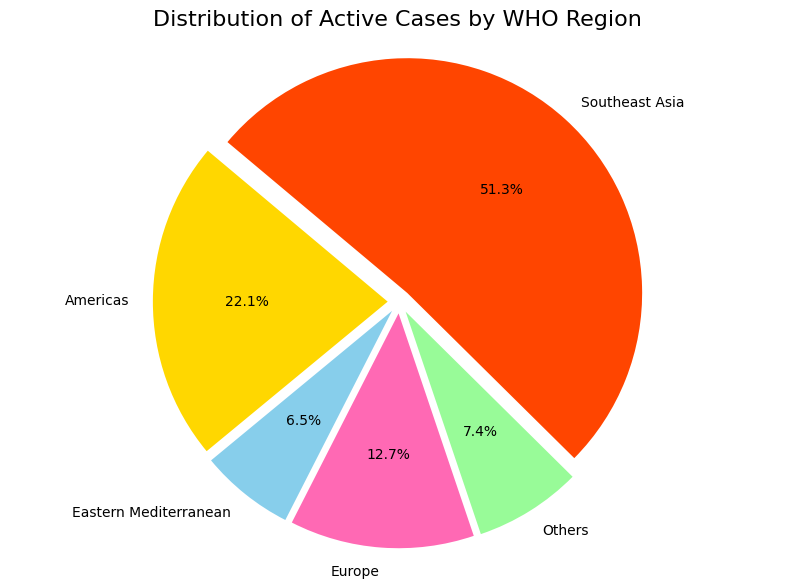

In [ ]:
#pie distribution of active cases by WHO Region
# Sample data
data = {
    'WHO Region': ['Africa', 'Europe', 'Americas', 'Eastern Mediterranean', 'Southeast Asia', 'Western Pacific'],
    'Active_Cases': [5121.750000, 20832.940299, 36071.590909, 10562.250000, 83905.666667, 6981.600000]
}

df = pd.DataFrame(data)

# Normalize Active Cases to percentages
df['Active_Cases_Percent'] = (df['Active_Cases'] / df['Active_Cases'].sum()) * 100
df['Active_Cases_Percent'] = df['Active_Cases_Percent'].round(1)

# Group smaller regions into "Others" if contribution is less than 5%
threshold = 5
df['Category'] = df.apply(
    lambda row: row['WHO Region'] if row['Active_Cases_Percent'] >= threshold else 'Others', axis=1
)
df_grouped = df.groupby('Category')['Active_Cases_Percent'].sum().reset_index()

# Plotting the pie chart
plt.figure(figsize=(10, 7))
colors = ['#FFD700', '#87CEEB', '#FF69B4', '#98FB98', '#FF4500', '#D8BFD8']
plt.pie(
    df_grouped['Active_Cases_Percent'],
    labels=df_grouped['Category'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=[0.05] * len(df_grouped)
)
plt.title('Distribution of Active Cases by WHO Region', fontsize=16)
plt.axis('equal')
plt.show()

In [ ]:

# Provided data
data = proc #{
   # 'WHO Region': ['Africa', 'Europe', 'Americas', 'Eastern Mediterranean', 'Southeast Asia', 'Western Pacific'],
   # 'Total_Cases': [18698.272727, 80261.522388, 152833.795455, 76531.150000, 269615.777778, 19381.950000],
   # 'Total_Recovered': [13231.931818, 43057.029851, 109479.250000, 63872.400000, 180085.888889, 12130.000000],
   # 'Active_Cases': [5121.750000, 20832.940299, 36071.590909, 10562.250000, 83905.666667, 6981.600000]
#}

df = pd.DataFrame(data)

# Display the DataFrame
print("Dataset:")
print(df)

Dataset:
                     Country        Lat       Long        Date  \
0                Afghanistan  33.939110  67.709953  2020-01-22   
1                    Albania  41.153300  20.168300  2020-01-22   
2                    Algeria  28.033900   1.659600  2020-01-22   
3                    Andorra  42.506300   1.521800  2020-01-22   
4                     Angola -11.202700  17.873900  2020-01-22   
...                      ...        ...        ...         ...   
38347  Sao Tome And Principe   0.186400   6.613100  2020-07-27   
38348                  Yemen  15.552727  48.516388  2020-07-27   
38349                Comoros -11.645500  43.333300  2020-07-27   
38350             Tajikistan  38.861000  71.276100  2020-07-27   
38351                Lesotho -29.610000  28.233600  2020-07-27   

                  WHO Region Continent  Population  Total_Cases  \
0      Eastern Mediterranean      Asia  39009447.0        36896   
1            European Region    Europe   2877470.0         6016 

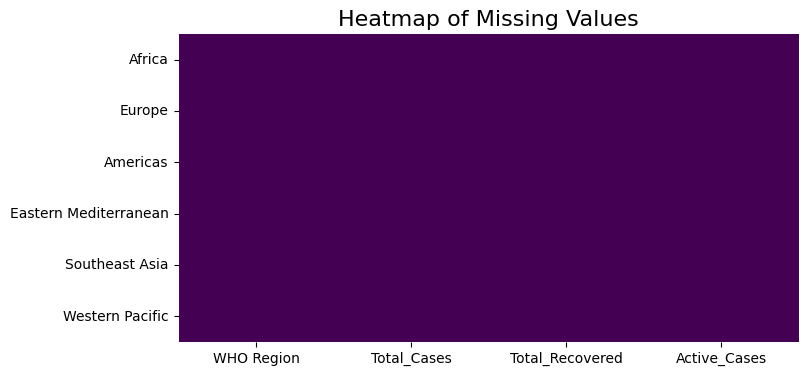

In [ ]:
# Checking for missing values
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=df['WHO Region'], annot=False)
plt.title('Heatmap of Missing Values', fontsize=16)
plt.show()

In [ ]:
# Summary of missing values
missing_summary = df.isnull().sum()
print("Missing Values Summary:")
print(missing_summary)

Missing Values Summary:
WHO Region         0
Total_Cases        0
Total_Recovered    0
Active_Cases       0
dtype: int64


<ipython-input-87-d2ee6f84847f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='WHO Region', y='Total_Cases', palette='Blues')


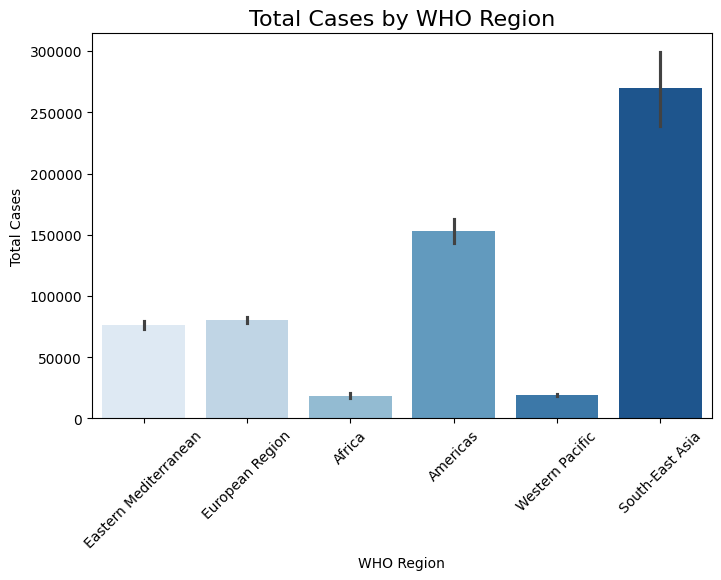

In [ ]:
#total cases by WHO Region bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='WHO Region', y='Total_Cases', palette='Blues')
plt.title('Total Cases by WHO Region', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Total Cases')
plt.xlabel('WHO Region')
plt.show()

<ipython-input-84-07e2539f7dea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='WHO Region', y='Active_Cases', palette='Blues')


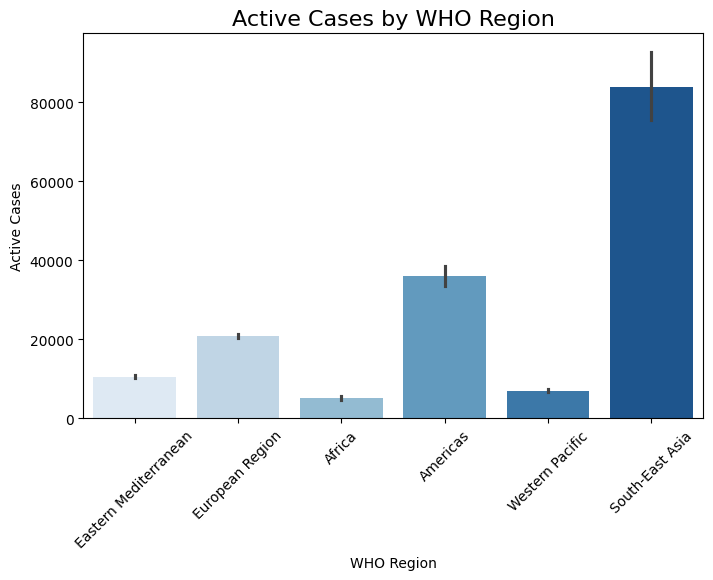

In [ ]:
#active cases by WHO Region bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='WHO Region', y='Active_Cases', palette='Blues')
plt.title('Active Cases by WHO Region', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Active Cases')
plt.xlabel('WHO Region')
plt.show()

<ipython-input-86-c8b64d8c6cdf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='WHO Region', y='Total_Recovered', palette='Blues')


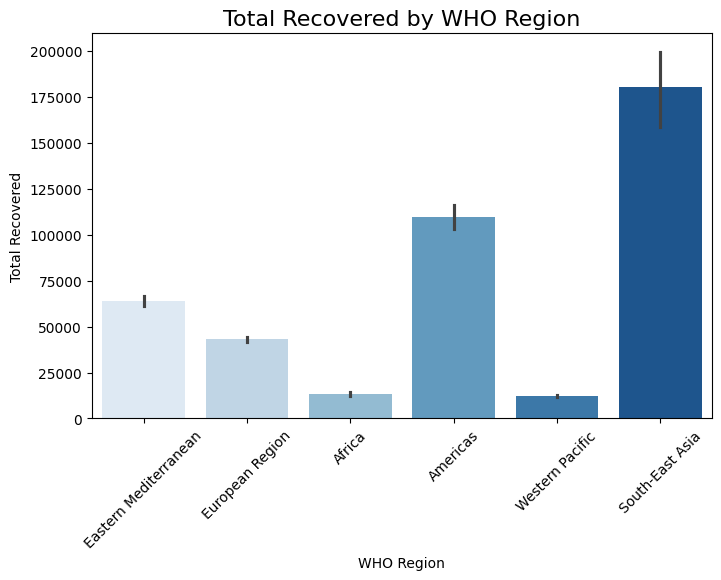

In [ ]:

#total records by WHO Region bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='WHO Region', y='Total_Recovered', palette='Blues')
plt.title('Total Recovered by WHO Region', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Total Recovered')
plt.xlabel('WHO Region')
plt.show()

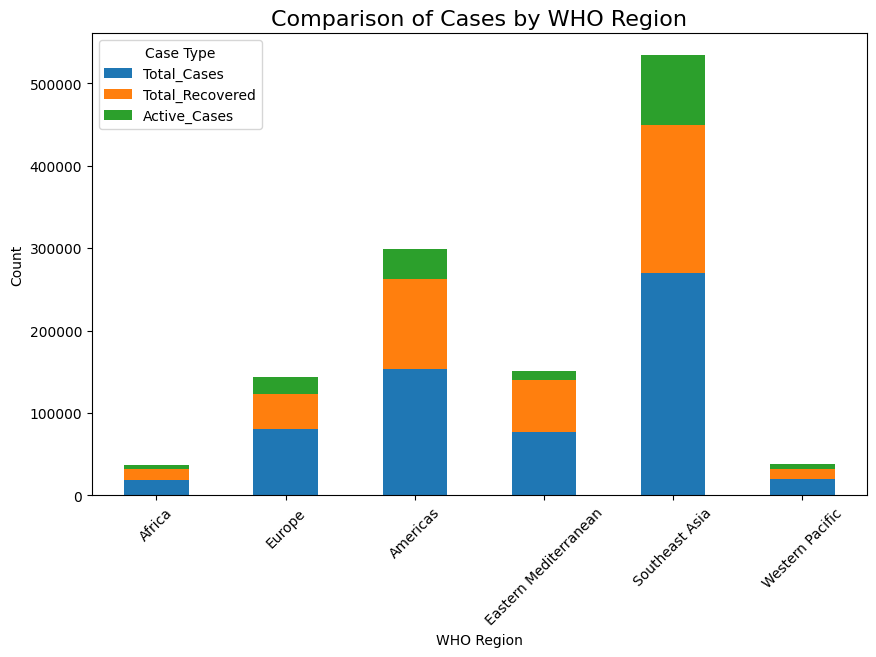

In [ ]:
#comparison of Total Cases, Recovered, and Active Cases
df.set_index('WHO Region')[['Total_Cases', 'Total_Recovered', 'Active_Cases']].plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Comparison of Cases by WHO Region', fontsize=16)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Case Type')
plt.show()

<ipython-input-82-46570f7229e6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=continent_case.index, y=continent_case.values, palette="viridis")


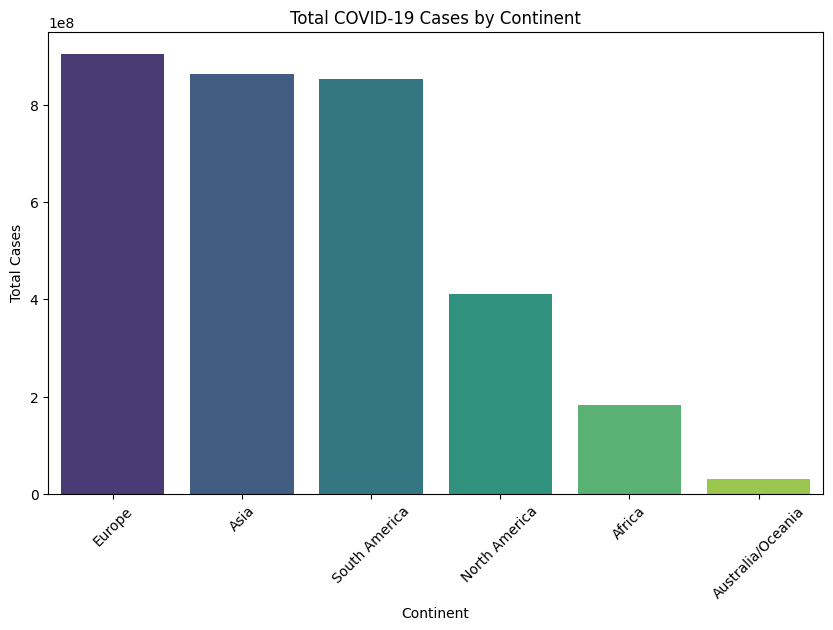

In [ ]:
#visualizing demographic and environmental factors
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping by continent and summing up the total cases
continent_case = df.groupby('Continent')['Total_Cases'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=continent_case.index, y=continent_case.values, palette="viridis")
plt.title('Total COVID-19 Cases by Continent')
plt.ylabel('Total Cases')
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if 'Continent' column exists, otherwise use the correct name
if 'Continent' not in df.columns:
    # If 'continent' is the correct column name (case insensitive)
    if 'continent' in df.columns.str.lower():
        df.rename(columns={'continent': 'Continent'}, inplace=True)  # Rename to 'Continent'
    # Otherwise, check if similar column name and rename or adjust the code accordingly
    else:
        print(f"Available columns: {df.columns}")

Available columns: Index(['WHO Region', 'Total_Cases', 'Total_Recovered', 'Active_Cases'], dtype='object')


In [ ]:
df.head(2)

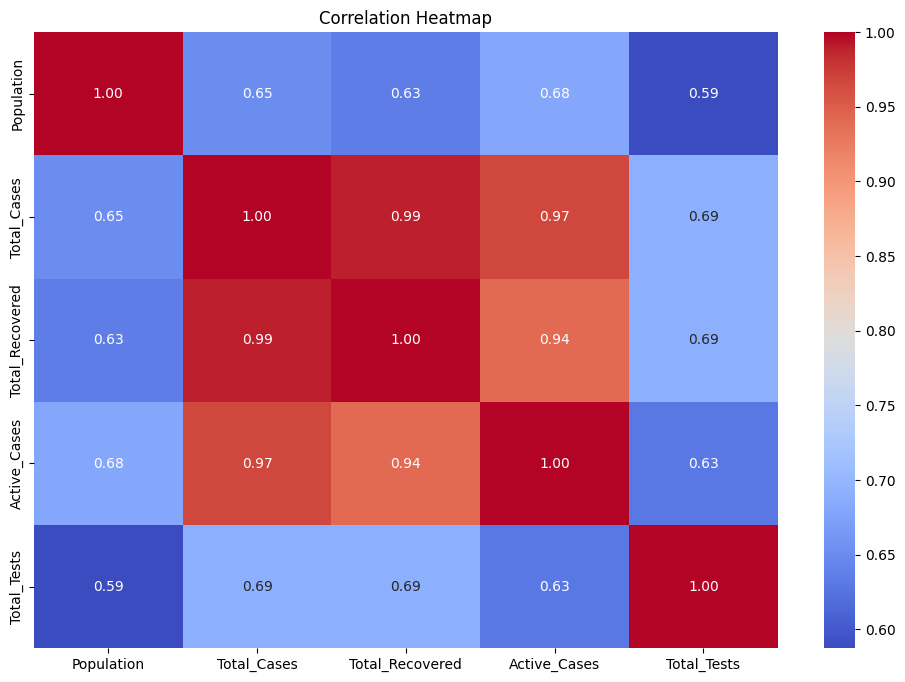

In [ ]:
#heatmap for correlation
plt.figure(figsize=(12, 8))
corr = df[['Population', 'Total_Cases', 'Total_Recovered', 'Active_Cases', 'Total_Tests']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#recovery rate and active case ratio
# Add Recovery Rate and Active Case Ratio
df['Recovery_Rate'] = (df['Total_Recovered'] / df['Total_Cases']) * 100
df['Active_Case_Ratio'] = (df['Active_Cases'] / df['Total_Cases']) * 100

print(df)

In [ ]:
proc.head(2)

In [ ]:
proc.head(2)

,Country,Lat,Long,Continent,Population,Total_Cases,Total_Recovered,Active_Cases,Total_Tests
Date,,,,,,,,,
2020-01-22,Afghanistan,0.548308,0.829120,1,0.048065,-0.180092,-0.163326,-0.156947,-0.455999
2020-01-22,Albania,0.820100,0.113507,3,-0.302904,-0.296534,-0.285337,-0.253478,-0.472541


In [ ]:

# Check for zero values in each column
zero_counts = (proc == 0).sum()
print(zero_counts)

In [ ]:
#turn out some columns are filled with zero values
#replace zeros with mean
for col in ['Total_Recovered']:
    proc['Total_Recovered'] = proc['Total_Recovered'].replace(0, proc[col].median())
for col in ['Active_Cases']:
    proc['Active_Cases'] = proc['Active_Cases'].replace(0, proc[col].median())
for col in ['Total_Tests']:
    proc['Total_Tests'] = proc['Total_Tests'].replace(0, proc[col].median())

In [ ]:
# recheck for zero values in each column
zero_counts = (proc == 0).sum()
print(zero_counts)

In [ ]:
proc.drop(columns=['Months_Since_Start', 'Total_Recovered_was_zero', 'Active_Cases_was_zero', 'Total_Tests_was_zero'], inplace=True)

In [ ]:

# Inspect the dataset
print(proc.info())
print(proc.describe())
print(proc.head())

# Check for missing values
missing_counts = proc.isnull().sum()
print("Missing values per column:\n", missing_counts)

In [ ]:
# Verify descriptive statistics
print(proc.describe())

In [ ]:
!pip install scikit-learn pandas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Assigning variable to DataFrame called 'data'
dataset = proc.copy()

# 2. Define the target variable (adjust threshold as needed)
# to predict high total cases (> 100000)
dataset['label'] = (dataset['Total_Cases'] > 100000).astype(int)

# 3. Select features
numerical_features = ['Total_Cases', 'Active_Cases', 'Total_Recovered']
categorical_features = ['WHO Region', 'Country', 'Continent']
all_features = numerical_features + categorical_features
X = dataset[all_features]
y = dataset['label']

# 4. Create preprocessing pipeline
# a. One-hot encoding for categorical features
# b. Standard scaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ])

# 5. Create a pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(C=1.0, kernel='rbf'))
])

# 6. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 7. Train the model
model.fit(X_train, y_train)

# 8. Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))